In [22]:
# imports
import requests
import pandas as pd
# from census import Census
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress

# api keys
from config import wkey, epakey, censuskey, epaemail

ImportError: cannot import name 'censuskey'

In [ ]:
# Abby's section starts here

In [5]:
# PurpleAir API

purple_air_df = pd.DataFrame()
purple_air_df['Index'] = [x for x in range(10000)]
purple_air_df = purple_air_df.set_index('Index')
purple_air_df['PLat'] = ""
purple_air_df['PLng'] = ""
purple_air_df['PLocation'] = ""
purple_air_df['PPM2_5'] = ""
purple_air_df['PDataDate'] = ""

base_url = "https://www.purpleair.com/json"
response = requests.get(base_url).json()

for index, row in purple_air_df.iterrows():
    
    try:
        purple_air_df.loc[index, 'PLat'] = response['results'][index]['Lat']
        purple_air_df.loc[index, 'PLng'] = response['results'][index]['Lon']
        purple_air_df.loc[index, 'PLocation'] = response['results'][index]['DEVICE_LOCATIONTYPE']
        purple_air_df.loc[index, 'PPM2_5'] = response['results'][index]['PM2_5Value']
        purple_air_df.loc[index, 'PDataDate'] = response['results'][index]['LastSeen']
#         could also pull time since last seen and only grab values from the last hour
    except:
        pass

purple_air_df = purple_air_df.dropna()
purple_air_df

,PLat,PLng,PLocation,PPM2_5,PDataDate
Index,,,,,
0,37.2756,-121.964,outside,3.64,1580175504
1,37.2756,-121.964,,,
2,30.0538,-95.4946,outside,21.4,1580175485
3,30.0538,-95.4946,,,
4,37.7224,-122.439,outside,14.52,1580175463
...,...,...,...,...,...
9995,33.907,-6.98929,,,
9996,40.4751,22.9599,outside,54.13,1580175565
9997,40.4751,22.9599,,,


In [37]:
purple_air_df = purple_air_df.loc[purple_air_df['PLocation']=='outside']
purple_air_df

,PLat,PLng,PLocation,PPM2_5,PDataDate
Index,,,,,
0,37.2756,-121.964,outside,3.64,1580175504
2,30.0538,-95.4946,outside,21.4,1580175485
4,37.7224,-122.439,outside,14.52,1580175463
6,36.8074,-119.796,outside,22.92,1580175535
8,42.7144,-73.2021,outside,1.89,1580175494
...,...,...,...,...,...
9990,37.4732,-121.916,outside,2.6,1580175530
9992,20.2507,-155.813,outside,0.53,1580175471
9994,33.907,-6.98929,outside,44.06,1580175515


In [42]:
# EPA API
# sample data (lowest granularity date) by box (lat, long range)

lat_lng_range = 0.001

pollutant = '88101'
beginning_date = 20200126
end_date = beginning_date+1

locations = purple_air_df[['PLat', 'PLng']]
lat_range = pd.DataFrame()
lat_range['Min Lat'] = locations.loc[:,'PLat'] - lat_lng_range
lat_range['Max Lat'] = locations.loc[:,'PLat'] + lat_lng_range
lng_range = pd.DataFrame()
lng_range['Min Lng'] = locations.loc[:,'PLng'] - lat_lng_range
lng_range['Max Lng'] = locations.loc[:,'PLng'] + lat_lng_range

# for minvalue, maxvalue in (zip(lat_range, lng_range)):
# #     for minlng, maxlng in lng_range:

#     base_url = "https://aps.eap.gov/data/api/sampleData/byBox?"
#     url = f'{base_url}email={epaemail}&key={epakey}&param={pollutant}&bdate={beginning_date}&edate={end_date}&minlat={minvalue}&maxlat={maxvalue}&minlon={minvalue}&maxlon={maxvalue}'
#     response = requests.get(url).json()
#     print(response)
#     #     try:
    

# minlat = 37.2756-0.001
# maxlat = 37.2756+0.001
# minlng = -121.964-0.001
# maxlng = -121.964+0.001

minlat = 37.2746
maxlat = 37.2766
minlng = -121.963
maxlng = -121.965
base_url = "https://aps.eap.gov/data/api/sampleData/byBox?"
url = f'{base_url}email={epaemail}&key={epakey}&param={pollutant}&bdate={beginning_date}&edate={end_date}&minlat={minlat}&maxlat={maxlat}&minlon={minlng}&maxlon={maxlng}'
response = requests.get(url).json()
print(response)
        

# ex: https://aqs.epa.gov/data/api/sampleData/byBox?email=test@aqs.api&key=test&param=44201&bdate=20150501&edate=20150502&minlat=33.3&maxlat=33.6&minlon=-87.0&maxlon=-86.7
# https://aqs.epa.gov/data/api/sampleData/byBox?email=abby.lemon22@gmail.com&key=indigogoose44&param=88101&bdate=20200126&edate=20200127&minlat=37.2746&maxlat=37.2766&minlon=-121.963&maxlon=-121.965

ConnectionError: HTTPSConnectionPool(host='aps.eap.gov', port=443): Max retries exceeded with url: /data/api/sampleData/byBox?email=abby.lemon22@gmail.com&key=indigogoose44&param=88101&bdate=20200126&edate=20200127&minlat=37.2746&maxlat=37.2766&minlon=-121.963&maxlon=-121.965 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x118b37da0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [34]:
# EPA API
# EPA Air Quality Section
# yearly data by state (minnesota)

pm2_5_1Hour = []
pm2_5_24HourBulk = []
pm2_5_24Hour = []
year_list = []
years = [x for x in range(1990,2020)]

email = 'abby.lemon22@gmail.com'
state_code = "27" 
# PM2.5 - Local Conditions
pollutant = "88101"

for year in years:
    beginging_date = f"{year}0502"
    end_date = f"{year}0502"
    base_url = "https://aqs.epa.gov/data/api/annualData/byState?"
    url = f'{base_url}email={email}&key={epakey}&param={pollutant}&bdate={beginging_date}&edate={end_date}&state={state_code}'
    response = requests.get(url).json()
    try:
        pm2_5_1Hour.append(response['Data'][0]['arithmetic_mean'])
        pm2_5_24HourBulk.append(response['Data'][1]['arithmetic_mean'])
        pm2_5_24Hour.append(response['Data'][5]['arithmetic_mean'])
        year_list.append(response['Data'][0]['year'])
    except:
        print(f"No data found, skip {year}.")
        pass



No data found, skip 1990.
No data found, skip 1991.
No data found, skip 1992.
No data found, skip 1993.
No data found, skip 1994.
No data found, skip 1995.
No data found, skip 1996.
No data found, skip 1997.
No data found, skip 1998.


In [35]:
pm2_5_df = pd.DataFrame([year_list,pm2_5_1Hour,pm2_5_24HourBulk,pm2_5_24Hour]).T
pm2_5_df = pm2_5_df.rename(columns={0:'Year',
                                    1:'PM 2.5 1 hour',
                                    2:'PM 2.5 24 hour bulk',
                                    3:'PM 2.5 24 hour'
})
pm2_5_df['Year'] = pm2_5_df['Year'].astype(int)
# pm2_5_df['PM 2.5'] = pm2_5
pm2_5_df.to_csv("Resource/EPAData_per_year_MN.csv")
pm2_5_df

,Year,PM 2.5 1 hour,PM 2.5 24 hour bulk,PM 2.5 24 hour
0,1999,10.050000,10.050000,11.355556
1,2000,9.532353,9.532353,12.748649
2,2001,12.737931,12.737931,8.647368
3,2002,10.081034,10.081034,9.828829
4,2003,7.150000,7.150000,9.376316
5,2004,8.204545,8.204545,5.416949
6,2005,10.305128,10.305128,6.614035
7,2006,8.764706,8.764706,6.421311
8,2007,9.593966,9.593966,8.778571
9,2008,9.490598,9.490598,10.006667


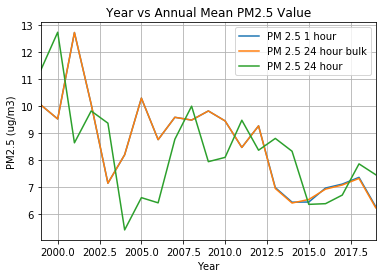

In [39]:
pm_plot = pm2_5_df.plot(kind='line', x='Year',y=['PM 2.5 1 hour','PM 2.5 24 hour bulk','PM 2.5 24 hour'],grid=True)
plt.ylabel('PM2.5 (ug/m3)')
plt.title("Year vs Annual Mean PM2.5 Value")
plt.savefig("Images/YearvsAnnualMeanPM2_5Value.png")
plt.show()

In [ ]:
# Census API
# Thinking I might not need to pull Census data.

c = Census(censuskey, year=2018)
# need to get this working for 2019, what is the difference between 2010 and 2019?
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E", "B19301_001E", "B17001_002E"), {'for': 'zip code tabulation area:*'})

census_pd = pd.DataFrame(census_data)
census_pd

In [ ]:
# Abby's section ends here

In [ ]:
# Alan's section starts here

In [23]:
temp = "Resource/temp data.csv"
temp_df = pd.read_csv(temp, encoding="utf-8")
temp_df

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
0,1/1/00,35,24,T,0,0
1,1/2/00,35,29,0.04,0.5,0
2,1/3/00,29,24,T,T,0
3,1/4/00,25,11,0.03,0.3,T
4,1/5/00,30,10,0.17,1.7,T
...,...,...,...,...,...,...
7300,12/27/19,29,23,0,0,4
7301,12/28/19,35,25,0.62,0.1,4
7302,12/29/19,42,34,0.4,0,3
7303,12/30/19,34,21,0.42,4.9,2


In [24]:
new_temp_df = temp_df.loc[:, ["Date", "Maximum Temperature degrees (F)"]]
new_temp_df

,Date,Maximum Temperature degrees (F)
0,1/1/00,35
1,1/2/00,35
2,1/3/00,29
3,1/4/00,25
4,1/5/00,30
...,...,...
7300,12/27/19,29
7301,12/28/19,35
7302,12/29/19,42
7303,12/30/19,34


In [25]:
new_temp_df.dtypes

Date                               object
Maximum Temperature degrees (F)     int64
dtype: object

In [26]:
new_temp_df["Date"] = pd.to_datetime(new_temp_df["Date"], errors="coerce")
new_temp_df

,Date,Maximum Temperature degrees (F)
0,2000-01-01,35
1,2000-01-02,35
2,2000-01-03,29
3,2000-01-04,25
4,2000-01-05,30
...,...,...
7300,2019-12-27,29
7301,2019-12-28,35
7302,2019-12-29,42
7303,2019-12-30,34


In [27]:
new_temp_df['Year'] = pd.DatetimeIndex(new_temp_df["Date"]).year
new_temp_df.head()

,Date,Maximum Temperature degrees (F),Year
0,2000-01-01,35,2000
1,2000-01-02,35,2000
2,2000-01-03,29,2000
3,2000-01-04,25,2000
4,2000-01-05,30,2000


In [28]:
temp_year = new_temp_df.groupby("Year")["Maximum Temperature degrees (F)"].mean()
temp_year

Year
2000    55.125683
2001    56.375342
2002    55.183562
2003    55.284932
2004    55.101093
2005    56.800000
2006    57.975342
2007    56.671233
2008    53.680328
2009    54.213699
2010    56.917808
2011    56.227397
2012    60.019126
2013    53.690411
2014    52.043836
2015    56.945205
2016    57.871585
2017    57.002740
2018    54.882192
2019    53.315068
Name: Maximum Temperature degrees (F), dtype: float64

In [29]:
temp_summary = pd.DataFrame(temp_year)
temp_summary

,Maximum Temperature degrees (F)
Year,
2000,55.125683
2001,56.375342
2002,55.183562
2003,55.284932
2004,55.101093
2005,56.800000
2006,57.975342
2007,56.671233
2008,53.680328


In [30]:
PM_data = "Resource/EPAData_per_year_MN.csv"
PM_data_df = pd.read_csv(PM_data, encoding="utf-8", index_col="Year")
PM_data_df

,Unnamed: 0,PM 2.5 1 hour,PM 2.5 24 hour bulk,PM 2.5 24 hour
Year,,,,
1999,0,10.050000,10.050000,11.355556
2000,1,9.532353,9.532353,12.748649
2001,2,12.737931,12.737931,8.647368
2002,3,10.081034,10.081034,9.828829
2003,4,7.150000,7.150000,9.376316
2004,5,8.204545,8.204545,5.416949
2005,6,10.305128,10.305128,6.614035
2006,7,8.764706,8.764706,6.421311
2007,8,9.593966,9.593966,8.778571


In [31]:
PM_data_df.drop(['Unnamed: 0'], axis=1)

,PM 2.5 1 hour,PM 2.5 24 hour bulk,PM 2.5 24 hour
Year,,,
1999,10.050000,10.050000,11.355556
2000,9.532353,9.532353,12.748649
2001,12.737931,12.737931,8.647368
2002,10.081034,10.081034,9.828829
2003,7.150000,7.150000,9.376316
2004,8.204545,8.204545,5.416949
2005,10.305128,10.305128,6.614035
2006,8.764706,8.764706,6.421311
2007,9.593966,9.593966,8.778571


In [32]:
Temp_pm_summary_df = pd.merge(temp_summary, PM_data_df, on='Year')
Temp_pm_summary_df

,Maximum Temperature degrees (F),Unnamed: 0,PM 2.5 1 hour,PM 2.5 24 hour bulk,PM 2.5 24 hour
Year,,,,,
2000,55.125683,1,9.532353,9.532353,12.748649
2001,56.375342,2,12.737931,12.737931,8.647368
2002,55.183562,3,10.081034,10.081034,9.828829
2003,55.284932,4,7.150000,7.150000,9.376316
2004,55.101093,5,8.204545,8.204545,5.416949
2005,56.800000,6,10.305128,10.305128,6.614035
2006,57.975342,7,8.764706,8.764706,6.421311
2007,56.671233,8,9.593966,9.593966,8.778571
2008,53.680328,9,9.490598,9.490598,10.006667


In [33]:
Temp_pm_summary_df.drop(['Unnamed: 0'], axis=1)

,Maximum Temperature degrees (F),PM 2.5 1 hour,PM 2.5 24 hour bulk,PM 2.5 24 hour
Year,,,,
2000,55.125683,9.532353,9.532353,12.748649
2001,56.375342,12.737931,12.737931,8.647368
2002,55.183562,10.081034,10.081034,9.828829
2003,55.284932,7.150000,7.150000,9.376316
2004,55.101093,8.204545,8.204545,5.416949
2005,56.800000,10.305128,10.305128,6.614035
2006,57.975342,8.764706,8.764706,6.421311
2007,56.671233,9.593966,9.593966,8.778571
2008,53.680328,9.490598,9.490598,10.006667


In [34]:
Temp_pm_summary_df = Temp_pm_summary_df.round(decimals=1)
Temp_pm_summary_df

,Maximum Temperature degrees (F),Unnamed: 0,PM 2.5 1 hour,PM 2.5 24 hour bulk,PM 2.5 24 hour
Year,,,,,
2000,55.1,1,9.5,9.5,12.7
2001,56.4,2,12.7,12.7,8.6
2002,55.2,3,10.1,10.1,9.8
2003,55.3,4,7.2,7.2,9.4
2004,55.1,5,8.2,8.2,5.4
2005,56.8,6,10.3,10.3,6.6
2006,58.0,7,8.8,8.8,6.4
2007,56.7,8,9.6,9.6,8.8
2008,53.7,9,9.5,9.5,10.0


In [35]:
Temp_pm_summary_df = Temp_pm_summary_df.drop(['Unnamed: 0'], axis=1)
Temp_pm_summary_df = Temp_pm_summary_df.reset_index()
Temp_pm_summary_df

,Year,Maximum Temperature degrees (F),PM 2.5 1 hour,PM 2.5 24 hour bulk,PM 2.5 24 hour
0,2000,55.1,9.5,9.5,12.7
1,2001,56.4,12.7,12.7,8.6
2,2002,55.2,10.1,10.1,9.8
3,2003,55.3,7.2,7.2,9.4
4,2004,55.1,8.2,8.2,5.4
5,2005,56.8,10.3,10.3,6.6
6,2006,58.0,8.8,8.8,6.4
7,2007,56.7,9.6,9.6,8.8
8,2008,53.7,9.5,9.5,10.0
9,2009,54.2,9.8,9.8,7.9


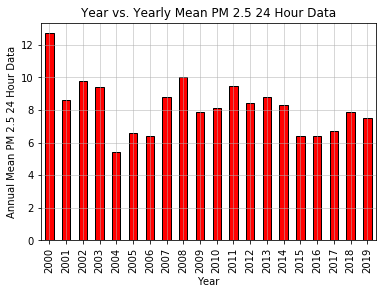

<Figure size 432x288 with 0 Axes>

In [36]:
bar_chart_temp = Temp_pm_summary_df.plot.bar(x="Year", y="PM 2.5 24 hour"
                                         , facecolor = "red", edgecolor = "black", legend=False)

plt.title("Year vs. Yearly Mean PM 2.5 24 Hour Data")
plt.xlabel("Year")
plt.ylabel("Annual Mean PM 2.5 24 Hour Data")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()

plt.savefig("Images/Year vs. Yearly Mean PM 2.5 24 Hour Data.png")

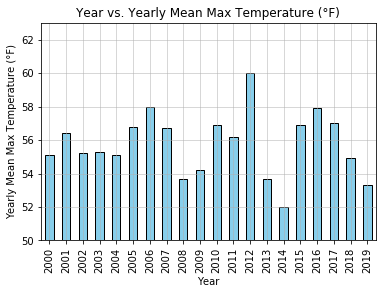

<Figure size 432x288 with 0 Axes>

In [37]:
bar_chart_PM = Temp_pm_summary_df.plot.bar(x="Year", y="Maximum Temperature degrees (F)"
                                         , facecolor = "skyblue", edgecolor = "black", legend=False)

plt.title("Year vs. Yearly Mean Max Temperature (°F)")
plt.xlabel("Year")
plt.ylim(+50)
plt.ylabel("Yearly Mean Max Temperature (°F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()

plt.savefig("Images/Year vs. Yearly Mean Max Temperature (°F).png")

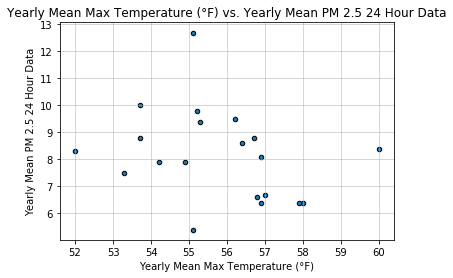

In [41]:
Temp_PM_scatter = Temp_pm_summary_df.plot.scatter(x="Maximum Temperature degrees (F)", y="PM 2.5 24 hour"
                                         , facecolor = "Green", edgecolor = "black")

plt.title("Yearly Mean Max Temperature (°F) vs. Yearly Mean PM 2.5 24 Hour Data")
plt.xlabel("Yearly Mean Max Temperature (°F)")
# plt.ylim(+50)
plt.ylabel("Yearly Mean PM 2.5 24 Hour Data")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()

In [49]:
Temp_pm_summary_df.dtypes

Year                                 int64
Maximum Temperature degrees (F)    float64
PM 2.5 1 hour                      float64
PM 2.5 24 hour bulk                float64
PM 2.5 24 hour                     float64
dtype: object

The r-squared is: -0.27999026330973253


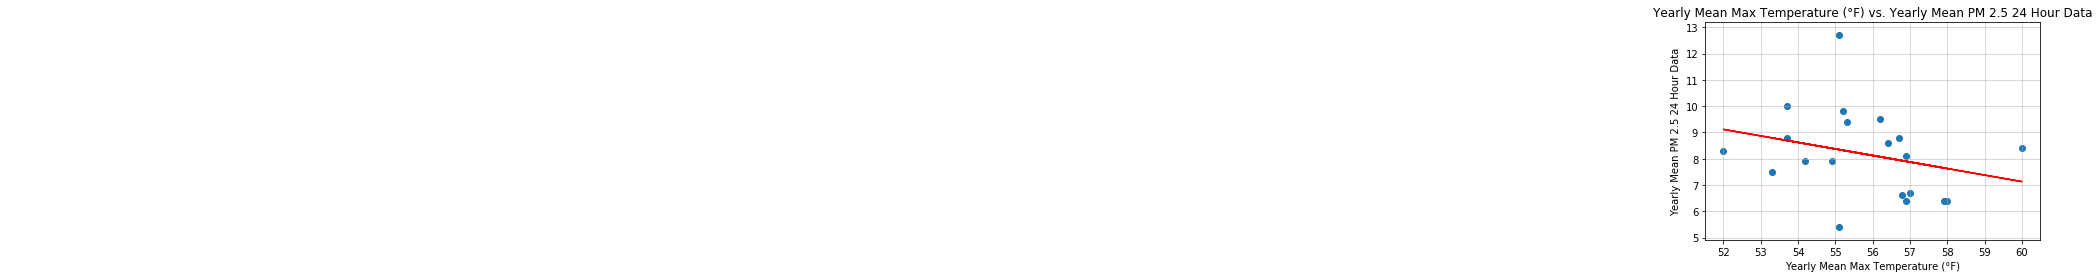

In [58]:
Temp_PM_scatter = Temp_pm_summary_df.plot.scatter(x="Maximum Temperature degrees (F)", y="PM 2.5 24 hour"
                                         , facecolor = "Green", edgecolor = "black")
x_values = Temp_pm_summary_df['Maximum Temperature degrees (F)']
y_values = Temp_pm_summary_df['PM 2.5 24 hour']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Yearly Mean Max Temperature (°F) vs. Yearly Mean PM 2.5 24 Hour Data")
plt.xlabel("Yearly Mean Max Temperature (°F)")
plt.ylabel("Yearly Mean PM 2.5 24 Hour Data")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
print(f"The r-squared is: {rvalue}")
# plt.tight_layout()
plt.show()

In [52]:
plt.savefig("Images/Scatter.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
# Alan's section ends here

In [ ]:
# Brandon's section starts here

In [ ]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests
from census import Census
from us import states
from config import epakey, censuskey

c = Census(censuskey)

In [ ]:
# Run Census Search to retrieve data on all counties in all states
# The c.acs5.get is from the census wrapping in a github repo
census_data_1 = c.acs5.get(("NAME", "B05012_001E"), {"for": "county:*"}, year = 2016)

# Convert to DataFrame
census_2016 = pd.DataFrame(census_data_1)

# Column Reordering
census_2016 = census_2016.rename(columns={"B05012_001E": "Population", "NAME": "Name", "county": "County"})

census_mn_1 = census_2016[census_2016["Name"].str.contains("Minnesota")]
census_mn_2016 = pd.concat([census_mn_1, census_mn_1["Name"].str.split(',', expand=True)], axis=1)
census_mn_2016 = census_mn_2016.rename(columns={0: "County", 1: "State Name", "County": "County Code"})
census_mn_2016["County"] = census_mn_2016["County"].str.replace("County", '')
census_mn_2016["County"] = census_mn_2016["County"].str.strip()
del census_mn_2016["Name"]

census_mn_2016.head()


In [ ]:
census_data_2 = c.acs5.get(("NAME", "B05012_001E"), {"for": "county:*"}, year = 2017)

# Convert to DataFrame
census_2017 = pd.DataFrame(census_data_2)

# Column Reordering
census_2017 = census_2017.rename(columns={"B05012_001E": "Population", "NAME": "Name", "county": "County"})

census_mn_2 = census_2017[census_2017["Name"].str.contains("Minnesota")]
census_mn_2017 = pd.concat([census_mn_2, census_mn_2["Name"].str.split(',', expand=True)], axis=1)
census_mn_2017 = census_mn_2017.rename(columns={0: "County", 1: "State Name", "County": "County Code"})
census_mn_2017["County"] = census_mn_2017["County"].str.replace("County", '')
census_mn_2017["County"] = census_mn_2017["County"].str.strip()
del census_mn_2017["Name"]

census_mn_2017.head()


In [ ]:
census_data_3 = c.acs5.get(("NAME", "B05012_001E"), {"for": "county:*"}, year = 2018)

# Convert to DataFrame
census_2018 = pd.DataFrame(census_data_3)

# Column Reordering
census_2018 = census_2018.rename(columns={"B05012_001E": "Population", "NAME": "Name", "county": "County"})

census_mn_3 = census_2018[census_2018["Name"].str.contains("Minnesota")]
census_mn_2018 = pd.concat([census_mn_3, census_mn_3["Name"].str.split(',', expand=True)], axis=1)
census_mn_2018 = census_mn_2018.rename(columns={0: "County", 1: "State Name", "County": "County Code"})
census_mn_2018["County"] = census_mn_2018["County"].str.replace("County", '')
census_mn_2018["County"] = census_mn_2018["County"].str.strip()
del census_mn_2018["Name"]

census_mn_2018.head()


In [ ]:
#read in EPA csv files
epa_aqi_2016 = pd.read_csv("AQI_2016.csv")
epa_aqi_2017 = pd.read_csv("AQI_2017.csv")
epa_aqi_2018 = pd.read_csv("AQI_2018.csv")

epa_aqi_mn_2016 = epa_aqi_2016[epa_aqi_2016["State"].str.contains("Minnesota")]
epa_aqi_mn_2017 = epa_aqi_2017[epa_aqi_2017["State"].str.contains("Minnesota")]
epa_aqi_mn_2018 = epa_aqi_2018[epa_aqi_2018["State"].str.contains("Minnesota")]

epa_aqi_mn_2018.head(10)

In [ ]:
census_mn_2016["County"] = census_mn_2016["County"].astype(str)
epa_aqi_mn_2016["County"] = epa_aqi_mn_2016["County"].astype(str)

df1 = epa_aqi_mn_2016.merge(census_mn_2016, on = "County")

df1.head()

In [ ]:
population_2016 = df1.iloc[:, 19]
air_2016 = df1.iloc[:, 4]
aqi_days_2016 = df1.iloc[:, 3]
df1["Air Quality"] = (air_2016 / aqi_days_2016)*100

air_quality_2016 = df1.iloc[:, 23]
six_slope, six_int, six_r, six_p, six_std_err = stats.linregress(population_2016, air_quality_2016)
six_fit = six_slope * population_2016 + six_int
line_1 = "y = " + str(round(six_slope, 6)) + "x + " + str(round(six_int, 2))
plt.scatter(population_2016, air_quality_2016)
plt.plot(population_2016, six_fit,"-", color = "red")
plt.xlabel("Population")
plt.ylabel("% Good Days")
plt.annotate(line_1, (33375, 70), fontsize=20, color = "red")
plt.show()
print(f"R squared: {six_r ** 2}")
df1.head(25)

In [ ]:
census_mn_2017["County"] = census_mn_2017["County"].astype(str)
epa_aqi_mn_2017["County"] = epa_aqi_mn_2017["County"].astype(str)

df2 = epa_aqi_mn_2017.merge(census_mn_2017, on = "County")

df2.head()

In [ ]:
population_2017 = df2.iloc[:, 19]
air_2017 = df2.iloc[:, 4]
aqi_days_2017 = df2.iloc[:, 3]
df2["Air Quality"] = (air_2017 / aqi_days_2017)*100

air_quality_2017 = df2.iloc[:, 23]
seven_slope, seven_int, seven_r, seven_p, seven_std_err = stats.linregress(population_2017, air_quality_2017)
seven_fit = seven_slope * population_2017 + seven_int
line_2 = "y = " + str(round(seven_slope, 6)) + "x + " + str(round(seven_int, 2))
plt.scatter(population_2017, air_quality_2017)
plt.plot(population_2017, seven_fit,"-", color = "red")
plt.xlabel("Population")
plt.ylabel("% Good Days")
plt.annotate(line_2, (33375, 60), fontsize=20, color = "red")
plt.show()
print(f"R squared: {seven_r ** 2}")
df2.head(25)

In [ ]:
census_mn_2018["County"] = census_mn_2018["County"].astype(str)
epa_aqi_mn_2018["County"] = epa_aqi_mn_2018["County"].astype(str)

df3 = epa_aqi_mn_2018.merge(census_mn_2018, on = "County")

df3.head()

In [ ]:
population_2018 = df3.iloc[:, 19]
air_2018 = df3.iloc[:, 4]
aqi_days_2018 = df3.iloc[:, 3]
df3["Air Quality"] = (air_2018 / aqi_days_2018)*100

air_quality_2018 = df3.iloc[:, 23]
eight_slope, eight_int, eight_r, eight_p, eight_std_err = stats.linregress(population_2018, air_quality_2018)
eight_fit = eight_slope * population_2018 + eight_int
line_3 = "y = " + str(round(eight_slope, 6)) + "x + " + str(round(eight_int, 2))
plt.scatter(population_2018, air_quality_2018)
plt.plot(population_2018, eight_fit,"-", color = "red")
plt.xlabel("Population")
plt.ylabel("% Good Days")
plt.annotate(line_3, (300000, 90), fontsize=20, color = "red")
plt.show()
print(f"R squared: {eight_r ** 2}")
df3.head(25)

In [ ]:
# Brandon's section ends here